<a href="https://colab.research.google.com/github/WilliamMejiaG/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
!pip install category_encoders

In [108]:
!pip install eli5

In [254]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import category_encoders as ce
import statsmodels.api as sm
import eli5
from eli5.sklearn import PermutationImportance

# **Data screening**

In [110]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/SALES_PREDICTIONS/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
#Exploring data to find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [112]:
#Creating the first filter to localte missing values in Item_Weight column feature
nan_filter_1 = df['Item_Weight'].isna()
df.loc[nan_filter_1,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [113]:
#Counting on the number of missing values
df['Item_Weight'].isna().sum()

1463

In [114]:
#Creating the second filter to localte missing values in Outlet_size column feature
nan_filter_2 = df['Outlet_Size'].isna()
df.loc[nan_filter_2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [115]:
#Counting the number of missing values
df['Outlet_Size'].isna().sum()

2410

In [116]:
#Calculating the mean for the first imputation
mean_weight = df['Item_Weight'].mean()

In [117]:
#Imputing the missing values of Item_Weight with its mean
df['Item_Weight'] = df.loc[:,'Item_Weight'].fillna(mean_weight)

In [118]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [119]:
#Check the imputation
df['Item_Weight'].isna().sum()

0

In [120]:
#Checking the most frequent categorical value
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [121]:
#Checking the order pandas outputs that value
most_frequent = df['Outlet_Size'].value_counts().index[0]
print(most_frequent)

Medium


In [122]:
#Imputing the missing values of Outlet_size with the most frequent categorical value
df['Outlet_Size'] = df.loc[:,'Outlet_Size'].fillna(most_frequent)

In [123]:
#Checking the imputation
df['Outlet_Size'].isna().sum()

0

In [124]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [125]:
#Checking the imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [126]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

# **Data analysis**

In [127]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [128]:
# Percentage calculations
sum_by_outlet_size = df.groupby(['Outlet_Size','Outlet_Type'])['Item_Outlet_Sales'].sum()
sum_by_outlet_size

Outlet_Size  Outlet_Type      
High         Supermarket Type1    2.142664e+06
Medium       Grocery Store        1.883402e+05
             Supermarket Type1    6.388161e+06
             Supermarket Type2    1.851823e+06
             Supermarket Type3    3.453926e+06
Small        Grocery Store        1.796941e+05
             Supermarket Type1    4.386518e+06
Name: Item_Outlet_Sales, dtype: float64

In [129]:
# Percentage by Outlet Size
sum_by_outlet_size/sum_by_outlet_size.groupby(level=0).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1.000000
Medium       Grocery Store        0.015851
             Supermarket Type1    0.537622
             Supermarket Type2    0.155848
             Supermarket Type3    0.290679
Small        Grocery Store        0.039353
             Supermarket Type1    0.960647
Name: Item_Outlet_Sales, dtype: float64

In [130]:
# Percentage by Outlet Type
sum_by_outlet_size/sum_by_outlet_size.groupby(level=1).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    0.165875
Medium       Grocery Store        0.511746
             Supermarket Type1    0.494541
             Supermarket Type2    1.000000
             Supermarket Type3    1.000000
Small        Grocery Store        0.488254
             Supermarket Type1    0.339584
Name: Item_Outlet_Sales, dtype: float64

In [131]:
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0.0000,2.142664e+06,0.00,0.000000e+00
Medium,188340.1724,6.388161e+06,1851822.83,3.453926e+06
Small,179694.0936,4.386518e+06,0.00,0.000000e+00


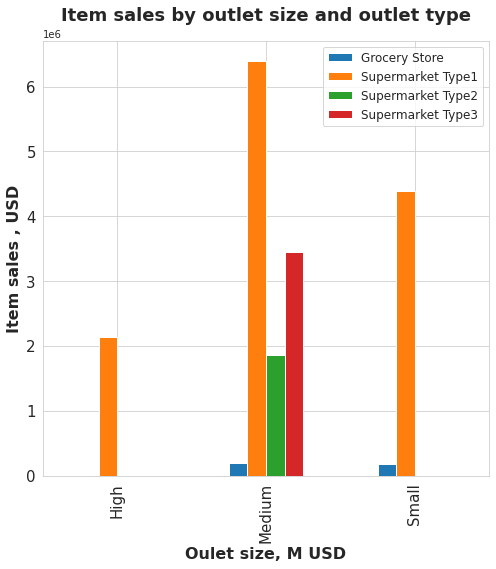

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0).plot(kind = 'bar', ax = ax)
ax.set_title('Item sales by outlet size and outlet type', fontsize = 18, fontweight = 'bold', pad = 20)
ax.set_xlabel('Oulet size, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item sales , USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)
ax.legend(fontsize = 12)
plt.show()

# Analyzing what item and how much money this item produce by Outlet Size and Outlet Type

# Outlet Size Medium and Outlet Type Supermarket Type 1

In [133]:
out_size_1 = df['Outlet_Size']=='Medium'
out_type_1 = df['Outlet_Type']=='Supermarket Type1'
df1 = df.loc[out_size_1 & out_type_1,:]
df1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


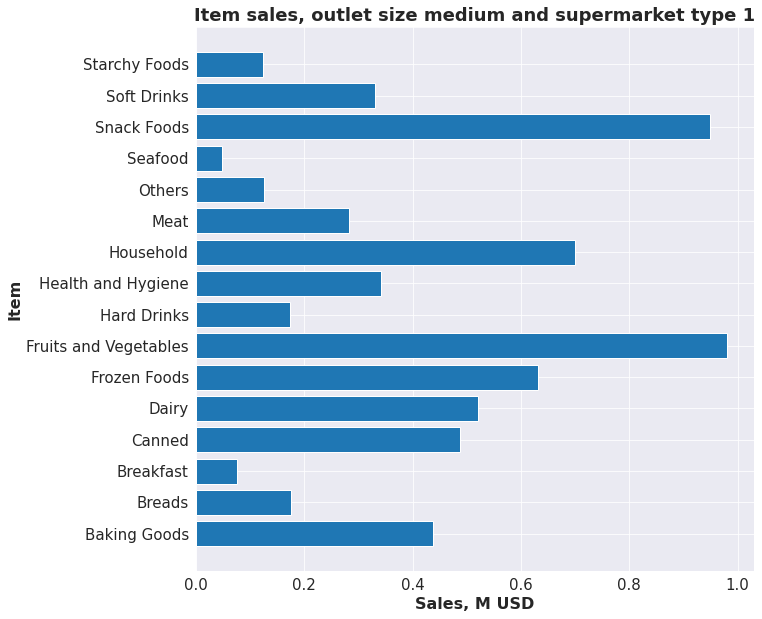

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
ax.barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax.set_title('Item sales, outlet size medium and supermarket type 1', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)


# Outlet Size Medium and Outlet Type Supermarket Type 2, 3 and grocery store

In [135]:
out_type_2 = df['Outlet_Type']=='Supermarket Type2'
df2 = df.loc[out_size_1 & out_type_2,:]
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [136]:
out_type_3 = df['Outlet_Type']=='Supermarket Type3'
df3 = df.loc[out_size_1 & out_type_3,:]
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.857645,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614


In [137]:
out_type_4 = df['Outlet_Type']=='Grocery Store'
df4 = df.loc[out_size_1 & out_type_4,:]
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266


(0.0, 1.0)

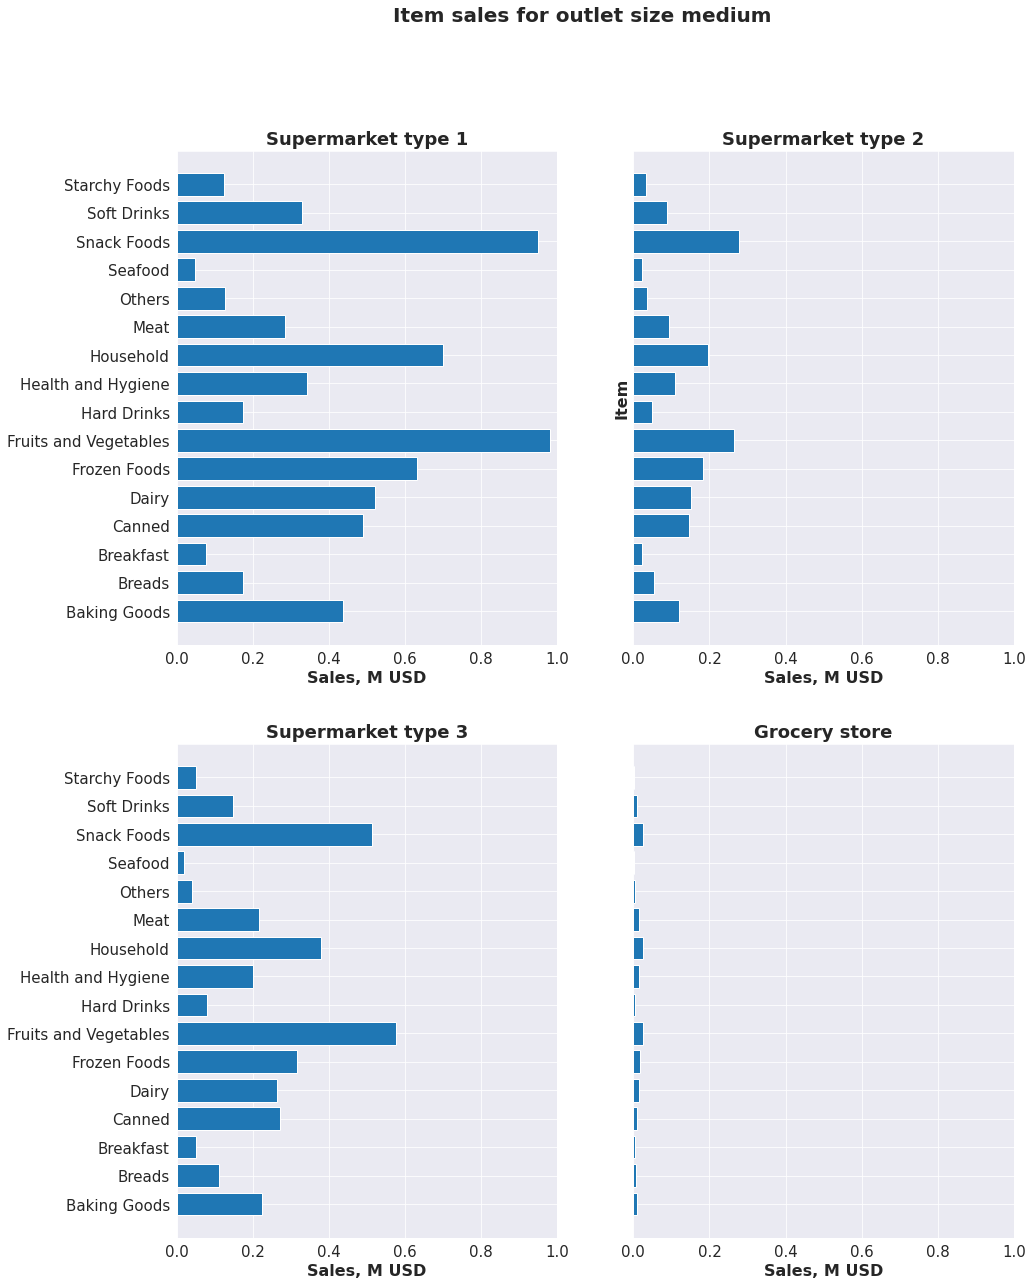

In [138]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,20), sharey='row')
fig.suptitle('Item sales for outlet size medium', fontsize = 20, fontweight = 'bold')
ax[0][1].barh(df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][1].set_title('Supermarket type 2', fontsize = 18, fontweight = 'bold')
ax[0][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][1].set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax[0][1].tick_params(axis='both', labelsize= 15)
ax[0][1].set_xlim(0,1)

ax[0][0].barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][0].set_title('Supermarket type 1', fontsize = 18, fontweight = 'bold')
ax[0][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][0].tick_params(axis='both', labelsize= 15)
ax[0][0].set_xlim(0,1)

ax[1][0].barh(df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][0].set_title('Supermarket type 3', fontsize = 18, fontweight = 'bold')
ax[1][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][0].tick_params(axis='both', labelsize= 15)
ax[1][0].set_xlim(0,1)

ax[1][1].barh(df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][1].set_title('Grocery store', fontsize = 18, fontweight = 'bold')
ax[1][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][1].tick_params(axis='both', labelsize= 15)
ax[1][1].set_xlim(0,1)

# Analysis with histograms, boxplots

## Histograms

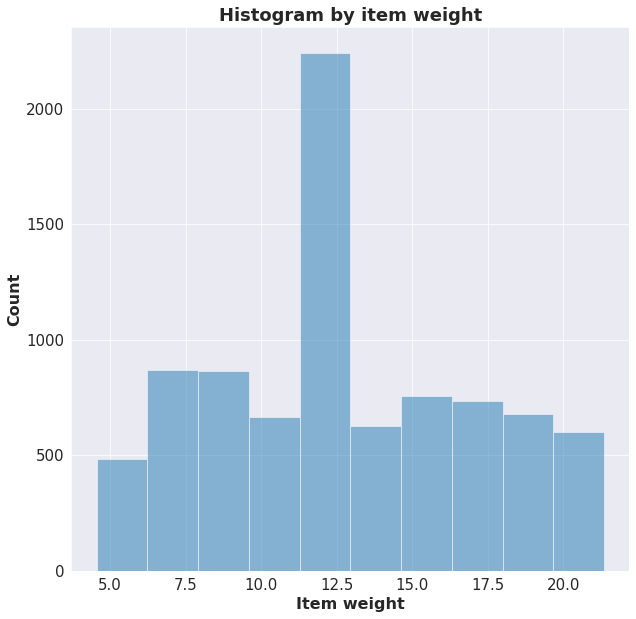

In [139]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Weight'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item weight', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item weight', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

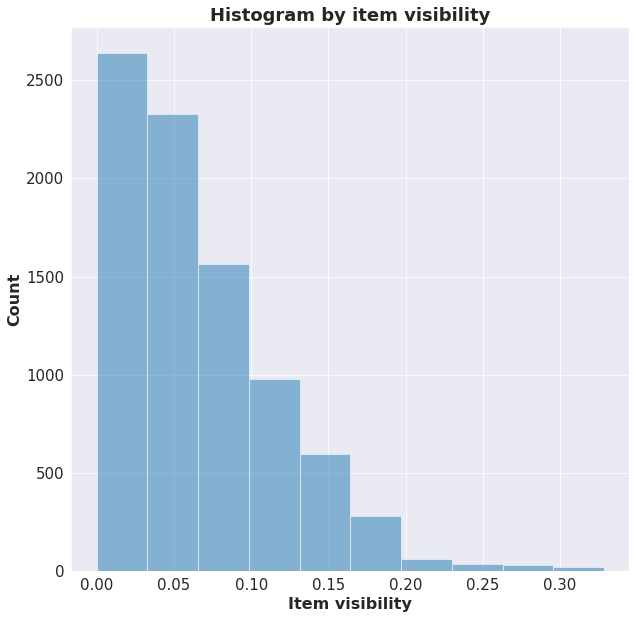

In [140]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Visibility'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item visibility', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item visibility', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

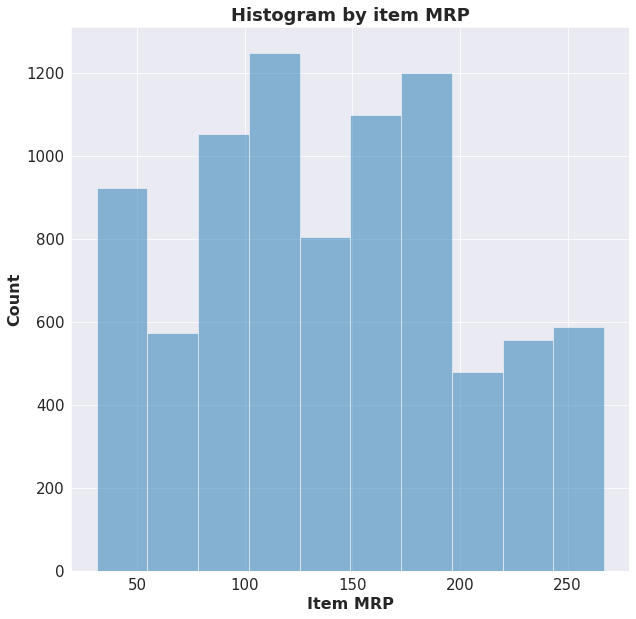

In [141]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_MRP'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item MRP', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item MRP', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

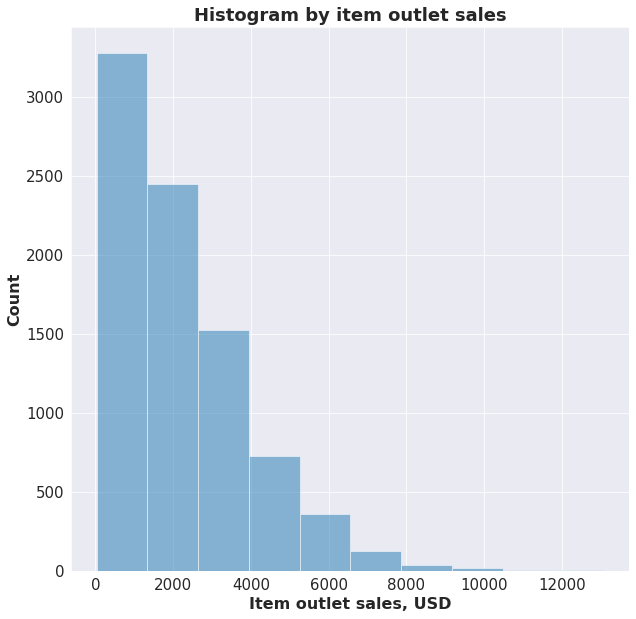

In [142]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Outlet_Sales'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item outlet sales', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

## Boxplots

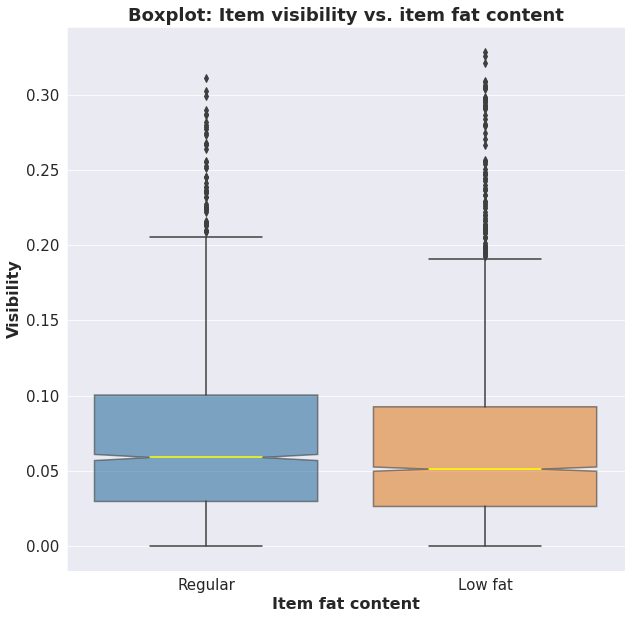

In [143]:
regular = df.loc[df['Item_Fat_Content']=="Regular",'Item_Visibility'].values
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat', 'Item_Visibility'].values
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.boxplot(data = [regular,low_fat],  boxprops=dict(alpha=.6), notch= True, medianprops={'color':'yellow'},ax=ax)
ax.set_title('Boxplot: Item visibility vs. item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
ax.set_xticklabels(['Regular','Low fat'], fontsize = 16)
ax.set_ylabel('Visibility', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

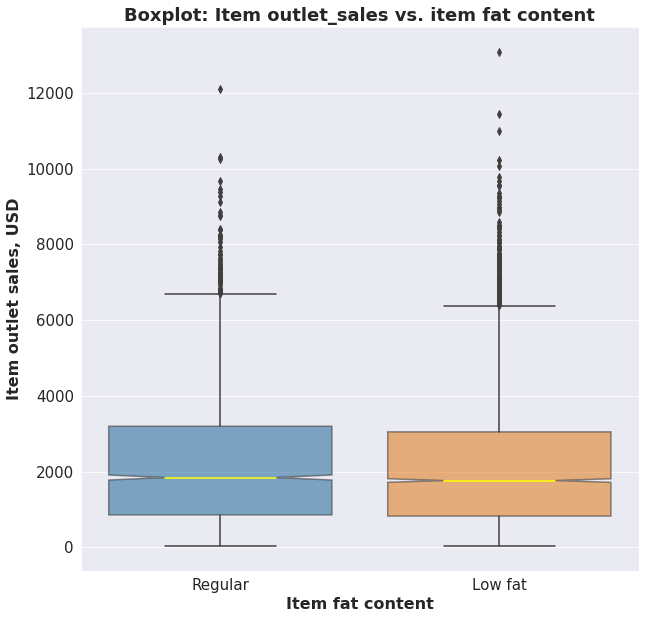

In [144]:
regular = df.loc[df['Item_Fat_Content']=="Regular",'Item_Outlet_Sales'].values
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat', 'Item_Outlet_Sales'].values
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.boxplot(data = [regular,low_fat],  boxprops=dict(alpha=.6), notch= True, medianprops={'color':'yellow'},ax=ax)
ax.set_title('Boxplot: Item outlet_sales vs. item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
ax.set_xticklabels(['Regular','Low fat'], fontsize = 16)
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

In [145]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


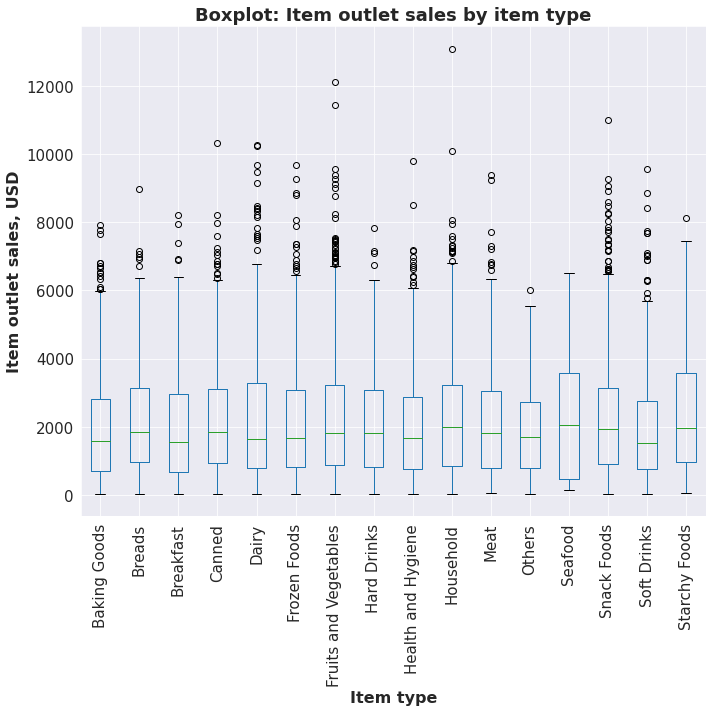

In [229]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', ax = ax)
ax.set_title('Boxplot: Item outlet sales by item type', fontsize = 18, fontweight = 'bold')
plt.suptitle('') # that's what you're after
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Item type', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 16)
ax.tick_params(axis='both', labelsize= 15)
plt.tight_layout()
plt.savefig('Sales-product', dpi = 300)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


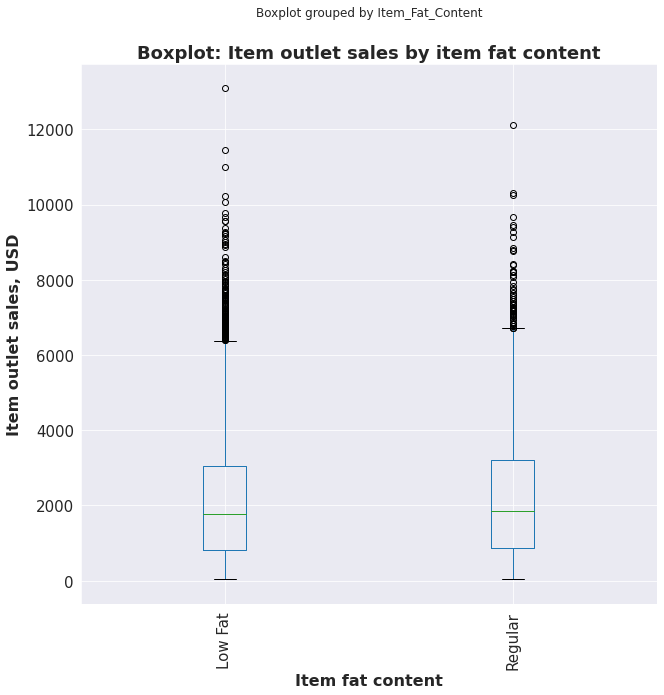

In [219]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content', ax = ax)
ax.set_title('Boxplot: Item outlet sales by item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 16)
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)
plt.show()

# Checking correlations

In [148]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [149]:
dfa = df.loc[:,['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']]

In [150]:
ohe = ce.OneHotEncoder(use_cat_names=True)
dfa_ohe = ohe.fit_transform(dfa)

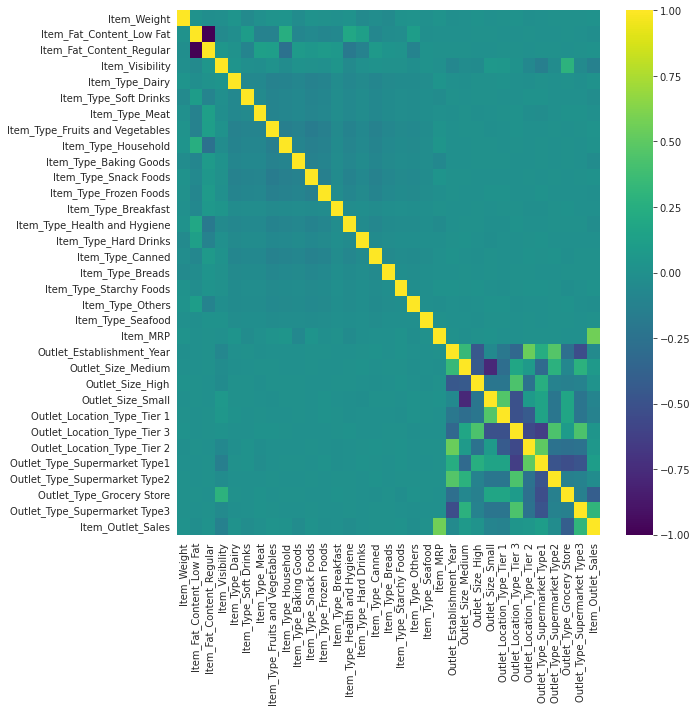

In [239]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.heatmap(dfa_ohe.corr(), ax=ax, cmap = 'viridis')
plt.tight_layout()
plt.savefig('map', dpi = 300)

# Regression and classification analysis including all variables

## Feature matrix and target vector

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
# Feature matrix
X = df.loc[:,['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [154]:
X.shape

(8523, 9)

In [155]:
y = df.loc[:,'Item_Outlet_Sales'].values

In [156]:
y.shape

(8523,)

# Hot Encoding

In [157]:
ohe = ce.OneHotEncoder(use_cat_names=True)

In [158]:
X_ohe = ohe.fit_transform(X)

In [159]:
X_ohe.head()

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,9.30,1,0,0.016047,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249.8092,1999,1,0,0,1,0,0,1,0,0,0
1,5.92,0,1,0.019278,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.2692,2009,1,0,0,0,1,0,0,1,0,0
2,17.50,1,0,0.016760,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,141.6180,1999,1,0,0,1,0,0,1,0,0,0
3,19.20,0,1,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,182.0950,1998,1,0,0,0,1,0,0,0,1,0
4,8.93,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,53.8614,1987,0,1,0,0,1,0,1,0,0,0


# Test and train data splitting

In [160]:
X_train, X_test, y_train, y_test  = train_test_split(X_ohe, y, random_state=3)

# Linear Regression

In [161]:
# Linear regression instance
lm = LinearRegression()
lm.fit(X_train,y_train)
y_predicted_linear = lm.predict(X_test)

## Score of linear regression

In [162]:
score_linear = lm.score(X_test, y_test)
score_linear

0.5887076960314116

In [163]:
summry_t = sm.OLS(y_test, X_test)
est_t = summry_t.fit()
print(est_t.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:17:17   Log-Likelihood:                -17916.
No. Observations:                2131   AIC:                         3.589e+04
Df Residuals:                    2103   BIC:                         3.605e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weigh

# k-NN regression

In [278]:
# k-NN regression instance
knnr = KNeighborsRegressor(n_neighbors= 6)
knnr.fit(X_train,y_train)
y_predicted_knnr = knnr.predict(X_test)

## Score of k-NN regression

In [279]:
score_knnr = knnr.score(X_test, y_test)
score_knnr

0.5150000641634909

In [166]:
n_neighbors_range = list(range(1,10,1))
scores = []
for neighbor in n_neighbors_range:
  knnr = KNeighborsRegressor(n_neighbors= neighbor)
  knnr.fit(X_train, y_train)
  score = knnr.score(X_test, y_test)
  scores.append(score)

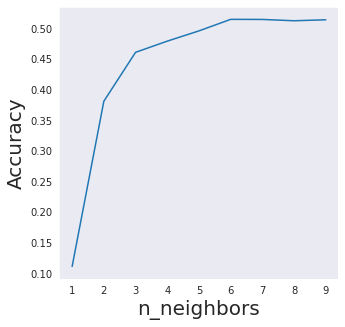

In [167]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
sns.set_style('darkgrid')
axes.plot(n_neighbors_range, scores)
axes.set_xlabel('n_neighbors', fontsize =20)
axes.set_ylabel('Accuracy', fontsize = 20)
axes.grid()

# New approach
This time the predictors will be divided into two, the first part consists of all variables related to the products properties, and the second of all variables related to the stores.

## Products related variables: features matrix and target vector

In [168]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [169]:
X_p = df.loc[:,[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP']]

In [170]:
X_p.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,9.30,Low Fat,0.016047,Dairy,249.8092
1,5.92,Regular,0.019278,Soft Drinks,48.2692
2,17.50,Low Fat,0.016760,Meat,141.6180
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950
4,8.93,Low Fat,0.000000,Household,53.8614


In [171]:
X_p.shape

(8523, 5)

In [172]:
y_p = df.loc[:,'Item_Outlet_Sales'].values

In [173]:
y_p.shape

(8523,)

## Data preprocessing

In [174]:
ohe = ce.OneHotEncoder(use_cat_names=True)

In [175]:
X_p_ohe = ohe.fit_transform(X_p)

In [176]:
X_p_ohe.head()

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP
0,9.30,1,0,0.016047,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249.8092
1,5.92,0,1,0.019278,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.2692
2,17.50,1,0,0.016760,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,141.6180
3,19.20,0,1,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,182.0950
4,8.93,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,53.8614


In [177]:
X_p_ohe.columns

Index(['Item_Weight', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Visibility', 'Item_Type_Dairy', 'Item_Type_Soft Drinks',
       'Item_Type_Meat', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Household', 'Item_Type_Baking Goods',
       'Item_Type_Snack Foods', 'Item_Type_Frozen Foods',
       'Item_Type_Breakfast', 'Item_Type_Health and Hygiene',
       'Item_Type_Hard Drinks', 'Item_Type_Canned', 'Item_Type_Breads',
       'Item_Type_Starchy Foods', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_MRP'],
      dtype='object')

In [178]:
## Data splitting

In [179]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p_ohe, y_p, random_state= 3)

## Linear regression

In [180]:
lm.fit(X_train_p, y_train_p)

LinearRegression()

In [181]:
lm.score(X_test_p,y_test_p)

0.3619098835125414

In [182]:
summry_p = sm.OLS(y_test_p, X_test_p)
est_p = summry_p.fit()
print(est_p.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     65.18
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          2.32e-195
Time:                        17:17:21   Log-Likelihood:                -18387.
No. Observations:                2131   AIC:                         3.681e+04
Df Residuals:                    2111   BIC:                         3.693e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weigh

## Model recalibration

In [183]:
X_p_rec = X_p_ohe.loc[:,['Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Item_Visibility','Item_Type_Snack Foods','Item_Type_Household','Item_Type_Canned','Item_MRP']]

In [184]:
X_p_rec_train, X_p_rec_test, y_train_p, y_test_p = train_test_split(X_p_rec, y_p, random_state = 3)

In [185]:
lm.fit(X_p_rec_train,y_train_p)

LinearRegression()

In [186]:
lm.score(X_p_rec_test,y_test_p)

0.36331036979379006

In [187]:
summry_p_rec = sm.OLS(y_test_p,X_p_rec_test)
est_p_rec = summry_p_rec.fit()
print(est_p_rec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     204.9
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          1.76e-206
Time:                        17:17:21   Log-Likelihood:                -18392.
No. Observations:                2131   AIC:                         3.680e+04
Df Residuals:                    2124   BIC:                         3.684e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Item_Fat_Content_Low Fat

In [188]:
pd.crosstab(index = df['Item_Type'], columns = df['Item_Fat_Content'], values= df['Item_Outlet_Sales'], aggfunc= np.sum).fillna(0)

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,5.805237e+05,6.850017e+05
Breads,3.056808e+05,2.475564e+05
Breakfast,9.944189e+04,1.328571e+05
Canned,7.531716e+05,6.909799e+05
Dairy,8.966828e+05,6.259113e+05
Frozen Foods,9.528910e+05,8.728438e+05
Fruits and Vegetables,1.374916e+06,1.445144e+06
Hard Drinks,4.577934e+05,0.000000e+00
Health and Hygiene,1.045200e+06,0.000000e+00


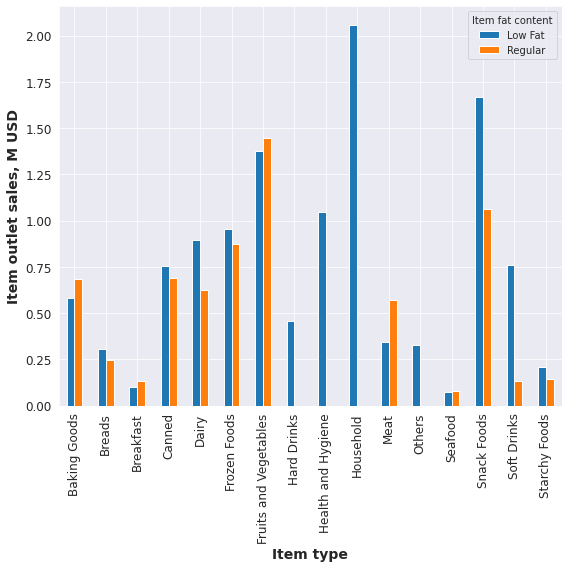

In [232]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.set_style('darkgrid')
pd.crosstab(index = df['Item_Type'], columns = df['Item_Fat_Content'], values= df['Item_Outlet_Sales'], aggfunc= np.sum).fillna(0).mul(10**(-6)).plot(kind= 'bar', ax = ax)
ax.set_ylabel('Item outlet sales, M USD',fontsize = 14, fontweight = 'bold')
ax.set_xlabel('Item type', fontsize = 14, fontweight = 'bold')
ax.tick_params(labelsize  = 12)
ax.legend(title = 'Item fat content')
plt.tight_layout()
plt.savefig('Sales-Item type fat', dpi = 300)


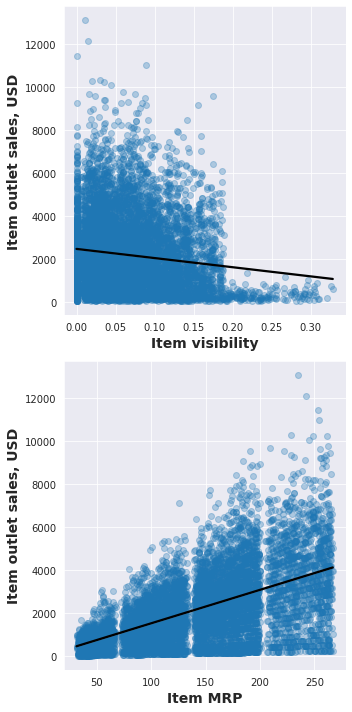

In [246]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (5,10))
sns.regplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df, ci = False, ax = ax[0], scatter_kws={'alpha':0.3}, line_kws={"color": "black"})
sns.regplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df, ci = False, ax = ax[1], scatter_kws={'alpha':0.3}, line_kws={"color": "black"})
ax[0].set_xlabel('Item visibility', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Item outlet sales, USD', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Item MRP', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('Item outlet sales, USD', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('conti-var')

## Outlet sales related variables: feature matrix and target vector

In [191]:
X_s = df.loc[:,['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]

In [192]:
X_s.shape

(8523, 4)

## Data preprocessing

In [193]:
ohe = ce.OneHotEncoder()
X_s_ohe = ohe.fit_transform(X_s)

In [194]:
X_s_ohe.head()

,Outlet_Establishment_Year,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
0,1999,1,0,0,1,0,0,1,0,0,0
1,2009,1,0,0,0,1,0,0,1,0,0
2,1999,1,0,0,1,0,0,1,0,0,0
3,1998,1,0,0,0,1,0,0,0,1,0
4,1987,0,1,0,0,1,0,1,0,0,0


## Data base splitting

In [195]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s_ohe, y_p, random_state = 3)

# Linear regression

In [196]:
lm.fit(X_train_s, y_train_s)

LinearRegression()

In [197]:
lm.score(X_test_s, y_test_s)

0.24580298729159533

In [198]:
summry = sm.OLS(y_test_s, X_test_s)
est = summry.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     87.70
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          7.29e-126
Time:                        17:17:29   Log-Likelihood:                -18574.
No. Observations:                2131   AIC:                         3.717e+04
Df Residuals:                    2122   BIC:                         3.722e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Outlet_Establishment_Y

In [233]:
colors = ['#1f77b4','#17becf','#bcbd22', '#DC7633','#28B463','#ff7f0e']
sns.set_palette(sns.color_palette(colors))

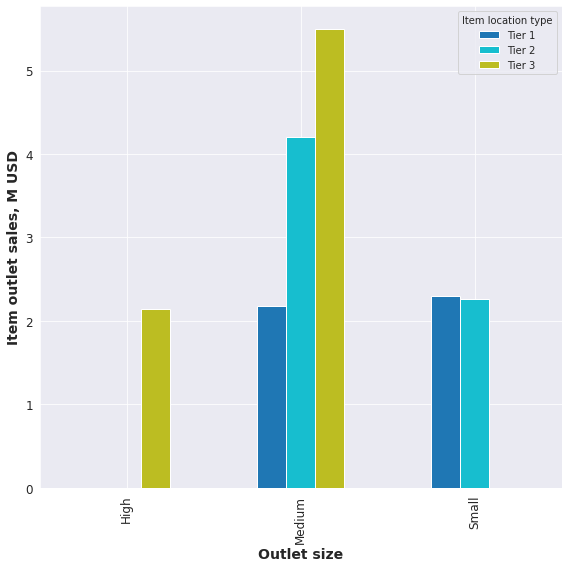

In [235]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.set_style('darkgrid')
pd.crosstab(index = df['Outlet_Size'], columns = df['Outlet_Location_Type'], values= df['Item_Outlet_Sales'], aggfunc= np.sum).fillna(0).mul(10**(-6)).plot(kind= 'bar', ax = ax)
ax.set_ylabel('Item outlet sales, M USD',fontsize = 14, fontweight = 'bold')
ax.set_xlabel('Outlet size', fontsize = 14, fontweight = 'bold')
ax.tick_params(labelsize  = 12)
ax.legend(title = 'Item location type')
plt.tight_layout()
plt.savefig('Sales-location')

In [200]:
pd.crosstab(index = df['Outlet_Size'], columns = df['Outlet_Type'], values= df['Item_Outlet_Sales'], aggfunc= lambda x: x.sum(), normalize=True).fillna(0).mul(100)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0.000000,11.525196,0.000000,0.000000
Medium,1.013065,34.361344,9.960789,18.578359
Small,0.966558,23.594688,0.000000,0.000000


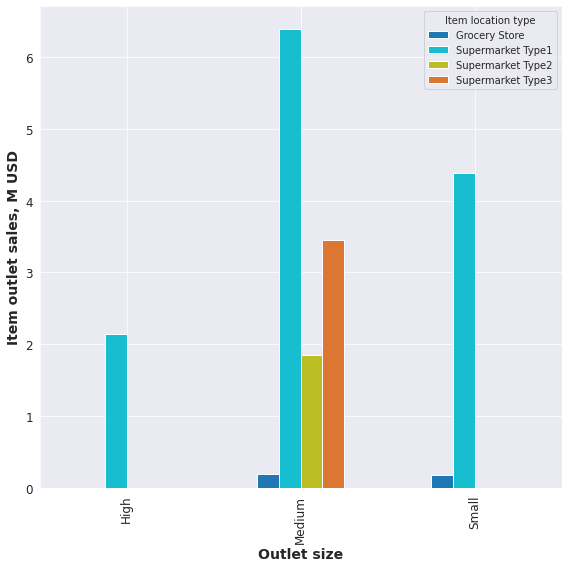

In [237]:
colors = ['#1f77b4','#17becf','#bcbd22', '#DC7633','#28B463','#ff7f0e']
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.set_style('darkgrid')
pd.crosstab(index = df['Outlet_Size'], columns = df['Outlet_Type'], values= df['Item_Outlet_Sales'], aggfunc= np.sum).fillna(0).mul(10**(-6)).plot(kind= 'bar', ax = ax)
ax.set_ylabel('Item outlet sales, M USD',fontsize = 14, fontweight = 'bold')
ax.set_xlabel('Outlet size', fontsize = 14, fontweight = 'bold')
ax.tick_params(labelsize  = 12)
ax.legend(title = 'Item location type')
plt.tight_layout()
plt.savefig('Sales-outlet type', dpi = 300)

# Random Forest approach

In [202]:
# With all variables
X_train, X_test, y_train, y_test  = train_test_split(X_ohe, y, random_state = 3)

In [203]:
X_train.shape

(6392, 32)

In [204]:
X_test.shape

(2131, 32)

In [205]:
clf = RandomForestRegressor(n_estimators = 20, random_state = 1,bootstrap= True)

In [206]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [207]:
clf.score(X_test,y_test)

0.5524795196611508

In [208]:
estimator_range =[1]+ list(range(10,100,10))
scores = []
for estimator in estimator_range:
  clf = RandomForestRegressor(n_estimators = estimator, bootstrap = True, random_state=1)
  clf.fit(X_train, y_train) 
  score = clf.score(X_test,y_test)
  scores.append(score)

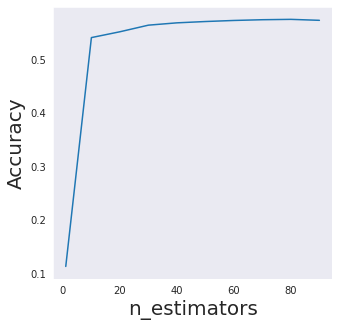

In [209]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
sns.set_style('darkgrid')
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize =20)
axes.set_ylabel('Accuracy', fontsize = 20)
axes.grid()

# Features importance: permutation method

In [210]:
my_model = RandomForestRegressor(n_estimators=40,random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7423 ± 0.0722,Item_MRP
0.3967 ± 0.0437,Outlet_Type_Grocery Store
0.0776 ± 0.0237,Outlet_Type_Supermarket Type3
0.0119 ± 0.0095,Outlet_Establishment_Year
0.0016 ± 0.0017,Outlet_Size_Small
0.0015 ± 0.0011,Outlet_Location_Type_Tier 1
0.0008 ± 0.0024,Item_Type_Fruits and Vegetables
0.0006 ± 0.0004,Item_Type_Breakfast
0.0005 ± 0.0013,Outlet_Location_Type_Tier 2
0.0004 ± 0.0009,Item_Type_Starchy Foods


# Cross validation comparison

In [262]:
X_train.shape

(6392, 32)

In [264]:
X_test.shape

(2131, 32)

In [338]:
lm = LinearRegression()
knnr = KNeighborsRegressor(n_neighbors= 6)
clf = RandomForestRegressor(n_estimators=40,random_state=1)
models = [lm,knnr,clf]
results = []
for model in models:
	# evaluate using a given number of repeats
	scores = cross_val_score(model,X_test, y_test, cv=10)
	results.append(scores)

In [339]:
results = pd.DataFrame(results)
results.head()

,0,1,2,3,4,5,6,7,8,9
0,0.617363,0.638663,0.601634,0.559608,0.519199,0.628126,0.576749,0.540954,0.546041,0.557382
1,0.320804,0.271574,0.296101,0.367309,0.228410,0.392400,0.341689,0.262122,0.329001,0.348036
2,0.623363,0.667042,0.619866,0.547793,0.492948,0.594611,0.520798,0.431692,0.468020,0.533258


In [356]:
results.std(axis = 1).round(2)

0    0.04
1    0.05
2    0.08
dtype: float64

In [348]:
a = results.iloc[0].mean()
b = results.iloc[1].mean()
c = results.iloc[2].mean()
print(f'Linear Regression scores mean: {a:.2f}, k-NN Regression scores mean: {b:.2f}, Random Forest Regressor mean: {c:.2f}')

Linear Regression scores mean: 0.58, k-NN Regression scores mean: 0.32, Random Forest Regressor mean: 0.55


In [355]:
results.mean(axis = 1).round(2)

0    0.58
1    0.32
2    0.55
dtype: float64

In [349]:
a = results.iloc[0].std()
b = results.iloc[1].std()
c = results.iloc[2].std()
print(f'Linear Regression scores std: {a:.2f}, k-NN Regression scores std: {b:.2f}, Random Forest Regressor std: {c:.2f}')

Linear Regression scores std: 0.04, k-NN Regression scores std: 0.05, Random Forest Regressor std: 0.08


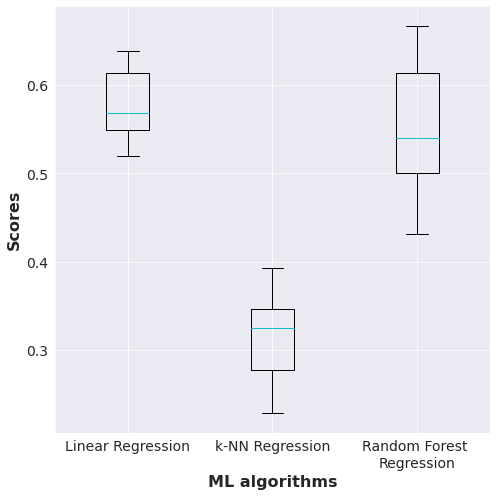

In [362]:
fig = plt.figure(figsize = (7,7))
sns.set_style('darkgrid')
plt.boxplot(results, labels = ['Linear Regression', 'k-NN Regression', 'Random Forest \nRegression'])
plt.xlabel('ML algorithms', fontsize = 16, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 16, fontweight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('Scores', dpi = 300)
